# Final Project 

**Course:** DSCI 100

**Author:** Ning Hu, Michael Alexander Gunardi, Gavin Lei, Michael Leung

**Group:** 30

**Date:** Due Dec 6th

**Question choose:**  1. What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

In [73]:
library(tidyverse)
library(repr)
library(tidymodels)
library(cowplot)
library(readr)
options(repr.matrix.max.rows = 6)

## 1. Introduction
A research group in Computer Science at UBC, led by Frank Wood, is collecting data about how people play video games. They have set up a Minecraft serverLinks to an external site, and players' actions are recorded as they navigate through the world

Video games are known to strongly motivate players and keep them engaged for long periods of time. Prior research shows that games have a **“high level of motivational potential”** (Sailer et al., 2017, p. 371). Because of this, game companies often use game-related messages, rewards, or newsletters to keep players involved. Gamification research also shows that game elements can motivate people to continue certain behaviours (Sailer et al., 2017, p. 372).

This suggests that player behaviours, such as how long they play which may reflect their motivation levels. Motivated players often continue engaging in related activities, since psychological needs such as competence and autonomy predict future game-playing behaviour (Sailer et al., 2017, p. 374). Therefore, **understanding which player characteristics are linked to higher motivation** may help explain who is more likely to subscribe to a game related newsletter.

Research also suggests that age influences how people participate in digital platforms. Younger users tend to be more active and more willing to use optional features. For example, Pfeil, Zaphiris, and Wilson (2009) found that **“Older adults showed slower performance, lower accuracy, and reported higher difficulty across computer-based tasks compared to younger adults”
(Smith & Chaparro, 2009, p. 368)**. This supports the idea that age may play a role in whether players decide to subscribe to a game-related newsletter.

During this research session, the broad problem our group is trying to figure out is **What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types**?. More specifically, **Can the player's total playtime and age predict whether they subscribe to the newsletter in the player database**?

In [74]:
players <- read.csv("https://raw.githubusercontent.com/gavinlei060322-cmd/GroupProject_DSCI-100-group-30-section-003-/refs/heads/main/players.csv")
head(players)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## Summary: 
This dataset frame contains information about individual players, including their experience level, subscription status, playtime, name, gender, and age. Each record represents a unique player identified by a hashed email address.

Number of observations: 196 players

Number of Variables: 7

## Data Description

- **Number of Observations**:
  - `players.csv`: 196 observations (rows)

- **Summary Statistics**:
  - **Age**: Min = 9, Max = 58, Mean = 21.14, Median = 19.00
  - **Played Hours**: Min = 0.00, Max = 223.10, Mean = 5.85, Median = 0.10

- **Observable Variables**:
  - **`players.csv`**:
    - **subscribe**: Logical (subscription status - TRUE or FALSE)
    - **played_hours**: Numeric (total number of hours played)
    - **Age**: Numeric (player's age)
 
- **Not Fully Observable Variables (Uses Characters)**:
  - **`players.csv`**:
    - **experience**: Character (level of experience: Pro, Veteran, Amateur)
    - **hashedEmail**: Character (unique identifier for each player)
    - **name**: Character (player's name)
    - **gender**: Character (player's gender)
 
- **Potential Issues**:
  - **Missing Data**: The `Age` and `gender` variables have a few NA's in the dataset.
  - **Outliers**: The `played_hours` variable contains a few extreme values (e.g., 223.1 hours).
  - **Data Types**: The `start_time` and `end_time` columns in `sessions.csv` are currently in character format and need conversion to `DateTime`.

## 2. Methods & Result

#### Method 
The method that we will be using to address the question **Can the player's total playtime and age predict whether they subscribe to the newsletter in the player database?** will be the KNN classification model. This will allow us to classify players as "subscribers" and "non-subscribers" based on their playtime and age.

<h3> Loading data</h3>

In [75]:
head(players)

,experience,subscribe,hashedEmail,played_hours,name,gender,Age
,<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<int>
1,Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
2,Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
3,Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
4,Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
5,Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
6,Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


<h3> Data wrangling and clean</h3>

Before exploring the data, we first clean the `players.csv`.csv dataset to keep only the variables that are relevant to our predictive question.
Since our goal is to understand how player characteristics relate to newsletter subscription, we focus on variables that describe experience, demographics, and engagement.

We remove the following columns:

`hashedEmail`: this is an identifier used to link with the sessions dataset. It does not provide useful information for predicting subscription and should not be used to avoid data leakage.

`name`: not a meaningful feature and may contain personal information.

We wan to convert the predicted object to factor:

`subscribe`: We converted subscribe from logical to **factor** because tidymodels requires a categorical outcome for classification models such as KNN.

Now clean up those identity variables in data frame and keep other variables: experience, played_hours, age, gender, subscribe

In [76]:
players_clean <- select(players, experience, played_hours, Age, gender, subscribe)|>
    drop_na(Age)|>
    mutate(subscribe = as.factor(subscribe))
players_clean

experience,played_hours,Age,gender,subscribe
<chr>,<dbl>,<int>,<chr>,<fct>
Pro,30.3,9,Male,TRUE
Veteran,3.8,17,Male,TRUE
Veteran,0.0,17,Male,FALSE
⋮,⋮,⋮,⋮,⋮
Veteran,0.3,22,Male,FALSE
Amateur,0.0,57,Prefer not to say,FALSE
Amateur,2.3,17,Male,FALSE



<h2>Summary of the dataframe above :</h2>

<h2>Variables</h2>

 Variable Name | Type | Description | Example Value |
|----------------|------|--------------|----------------|
| `experience` | Categorical (`chr`) | Player’s skill level or rank. | `Pro` |
| `subscribe` | Factor (`Fct`) | Outcome variable indicating whether the player has an active subscription（2 level）. | `TRUE` |
| `played_hours` | Numeric (`dbl`) | Total number of hours the player has spent playing. | `30.3` |
| `gender` | Categorical (`chr`) | Player’s gender identity | `male` |
| `Age` | Numeric (`dbl`) | Player’s age in years. Contains some missing values (`NA`). | `17` |

---

<h2>Summary Statistic</h2>

Summary statistics help us understand the general distribution of the numeric variables before modelling. For example, the played_hours variable contains some extreme values and many zeros, which may affect prediction. Checking missing values also helps us decide how to clean the data.

| Variable | Mean | Min | Max | Missing (%) |
|-----------|------|-----------|------|--------------|
| `played_hours` | *5.85* | *0* | *223.1* | 0% |
| `Age` | *21.14* | *9* | *58* | 1.02% |
---

<h2>Some of the problems that can be observed in the dataframe</h2>

<h3>Direct Observations of data that is relevant for exploratory data analysis related to the planned analysis </h3>

- The **played_hours** variable contains many zeros, possibly representing new players who have not yet begun playing; however, this might affect our later prediction in answering the question based on the data.

- The **Age** variable has some missing values, which must be handled before modelling.


<h2>Visualization of relevant variables</h2>

We now visualize both age and playtime to observe the initial trends. First, we compare age and mean played hours, and colour it using the subscribe status. We can observe a trend in this graph : the people with higher mean played hours tend to be subscribed. On the other hand, people with lower hours tend to not be subscribed. This happens irrelevant of age.

Warning message:
“Removed 1 row containing missing values or values outside the scale range
(`geom_point()`).”


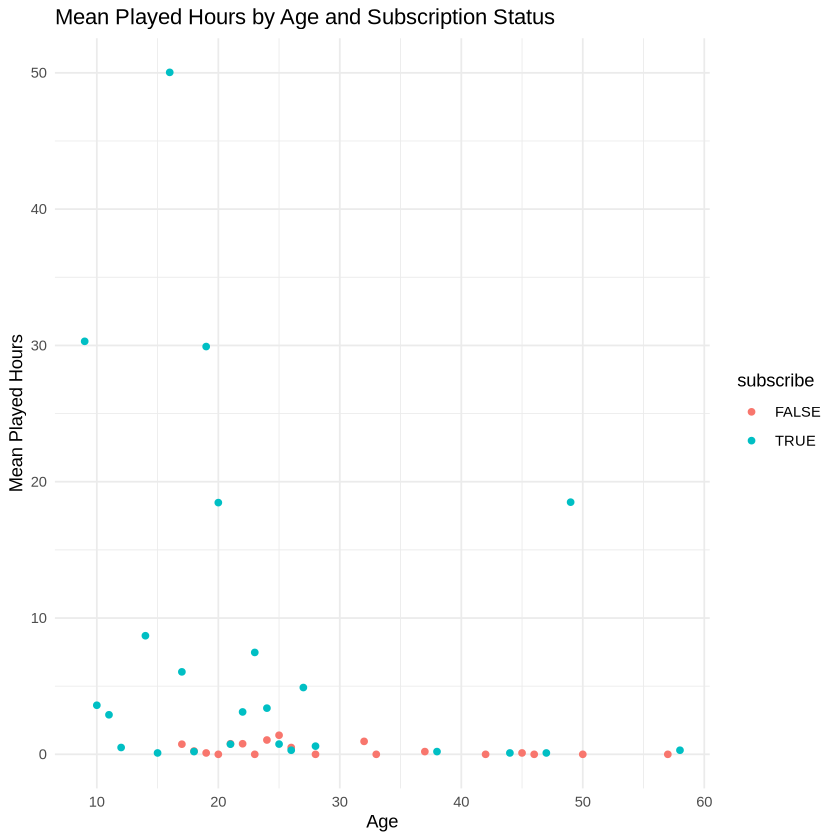

In [77]:
players |>
  group_by(subscribe, Age) |>
  summarise(mean_hours = mean(played_hours), .groups = "drop") |>
  ggplot(aes(x = Age, y = mean_hours, color = subscribe)) +
  geom_point() +
  labs(title = "Mean Played Hours by Age and Subscription Status",
       x = "Age",
       y = "Mean Played Hours") +
  theme_minimal()

This plot shows the average played hours for different ages, separated by subscription status. Overall, subscribers tend to have higher mean playtime than non-subscribers. Although **more young people are subscribed** in the figure, the **strong trend that people with longer play time are more willingness to subscribe**, while both are likely possible predictors, and .


Now, we separate both age and played_hours to see the trends **individually**. 

Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


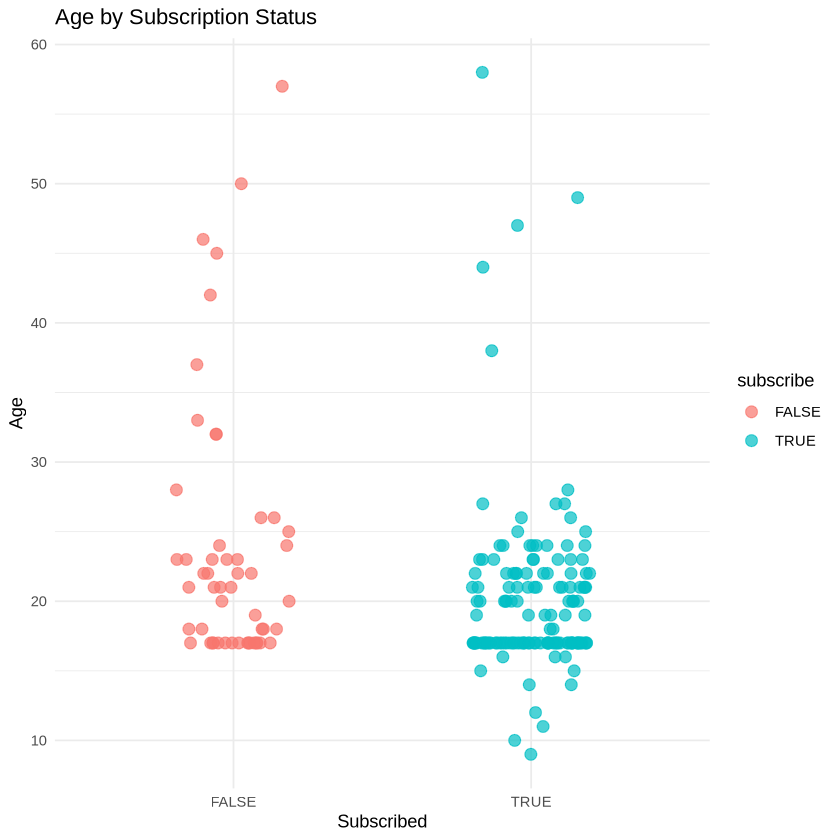

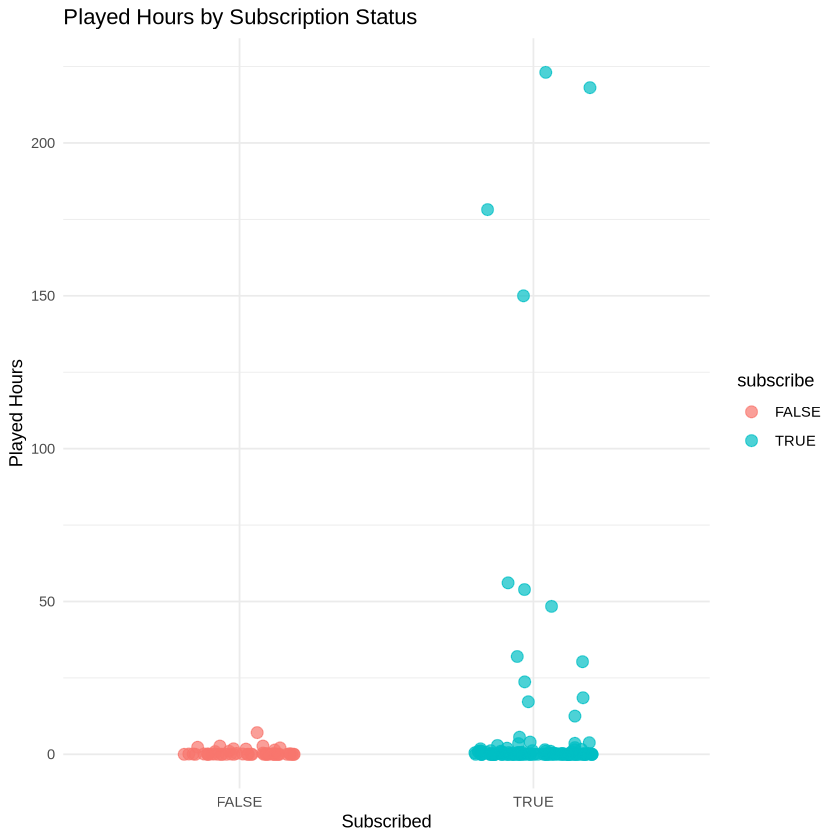

In [78]:
players |> 
  ggplot(aes(x = subscribe, y = Age, color = subscribe)) +
  geom_jitter(width = 0.2, height = 0, alpha = 0.7, size = 3) +
  labs(title = "Age by Subscription Status",
       x = "Subscribed",
       y = "Age") +
  theme_minimal()

players |> 
  ggplot(aes(x = subscribe, y = played_hours, color = subscribe)) +
  geom_jitter(width = 0.2, height = 0, alpha = 0.7, size = 3) +
  labs(title = "Played Hours by Subscription Status",
       x = "Subscribed",
       y = "Played Hours") +
       theme_minimal()

As we can see in the scatterplot for played hours, again, the people with the most played hours are subscribed. In the scatterplot for age, we can see that **more young people are subscribed**, while for the rest of the ages it is around the same distribution.

This figure below reveals a clearer pattern that **players with higher total playtime are far more likely to subscribe**. Non-subscribers cluster near zero hours, while several high-playtime individuals fall into the subscribed group. This supports the idea that played_hours is a strong predictor and should be included in the model.

### EDA Summary
Both age and played_hours show meaningful patterns related to subscription. Age gives a weaker but noticeable trend, where **younger players subscribe slightly more often**. However, played_hours shows a much clearer distinction that **players with higher total playtime are far more likely to subscribe**, indicating that it is likely the stronger predictor.

Together, these observations support using both variables for modelling, while expecting played_hours to contribute more strongly to the final classification.

<h2>Data Analysis</h2>

We use the **KNN** method because it does not assume any specific mathematical relationship between age, playtime, and subscription, which fits our non-linear EDA patterns.

### 1) Spliting data

We **split the data into training and testing sets** to evaluate how well the model performs on unseen observations.
The split is stratified by Age to maintain similar age distributions between the training and test subsets.

We will use a **75% training / 25% testing split**, with stratification by Age to keep the age distribution similar in both sets. This ensures that the model is trained on representative players.

In [79]:
set.seed(4321)
players_split <- initial_split(players_clean, prop = 0.75, strata = Age)
players_train <- training(players_split)
players_test <- testing(players_split)
players_train
players_test

experience,played_hours,Age,gender,subscribe
<chr>,<dbl>,<int>,<chr>,<fct>
Pro,30.3,9,Male,TRUE
Veteran,3.8,17,Male,TRUE
Veteran,0.0,17,Male,FALSE
⋮,⋮,⋮,⋮,⋮
Amateur,1.0,26,Male,FALSE
Amateur,2.1,24,Male,FALSE
Veteran,0.1,44,Female,TRUE


experience,played_hours,Age,gender,subscribe
<chr>,<dbl>,<int>,<chr>,<fct>
Regular,0,19,Female,TRUE
Amateur,0,21,Male,FALSE
Amateur,0,22,Male,FALSE
⋮,⋮,⋮,⋮,⋮
Amateur,32,22,Male,TRUE
Amateur,0,17,Female,TRUE
Amateur,0,57,Prefer not to say,FALSE


### 2) Recipe: Scale and center 

Because KNN is a distance-based method, variables measured on different scales can **unfairly influence the distance calculation**. For example, played_hours can reach values much larger than age, which would cause the model to rely mostly on playtime when comparing players.

To **prevent unfairness, we scale and center** both numeric predictors (Age and played_hours). This puts the variables on the same scale and allows KNN to compare players more fairly.

We use a **recipe** to apply scaling and centering during model training.

In [80]:
set.seed(4321)
players_recipe <- recipe(subscribe ~ Age + played_hours, data = players_train) |>
  step_center(all_predictors()) |>
  step_scale(all_predictors())
players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 2



── Operations 

• Centering for: all_predictors()

• Scaling for: all_predictors()



### 3) Spec: Specifying the KNN Model

After preparing the predictors with scaling and centering, we define the **KNN classification model**.

We do **not select K** yet, because we want to use **cross validation** to find the value of **k that gives the best predictive performance**.
Therefore, we leave k as a **tunable parameter** in the model specification.

In [81]:
set.seed(4321)
players_knn_spec <- nearest_neighbor(weight_func = "rectangular",neighbors = tune())|>
  set_engine("kknn")|>
  set_mode("classification")
players_knn_spec

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


### 4) Cross validation

Cross-validation allows us to evaluate the model on several different splits of the training dataset and helps avoid overfitting.

We are going to find **best value of k** for our KNN model, we use **5 fold cross validation** on the training data

In [82]:
set.seed(4321)
players_folds <- vfold_cv(players_train, v = 5)

### 5) Find best K

We are going to tuning k to ensure that the final model has the **best balance of accuracy** and generalization which is not over or underfitting

We are going to try k in a range of 1-50

In [83]:
set.seed(4321)
knn_grid <- tibble(neighbors = seq(from = 1, to = 50, by = 1))

best_k_workflow <- workflow()|>
add_model(players_knn_spec)|>
add_recipe(players_recipe)|>
tune_grid(resample = players_folds, grid = knn_grid)|>
collect_metrics()
best_k_workflow

best_k <- best_k_workflow |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean)) |>
  slice(1)

best_k

neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.5551724,5,0.01919919,Preprocessor1_Model01
1,roc_auc,binary,0.4369986,5,0.01945207,Preprocessor1_Model01
2,accuracy,binary,0.5342365,5,0.02060886,Preprocessor1_Model02
⋮,⋮,⋮,⋮,⋮,⋮,⋮
49,roc_auc,binary,0.5515251,5,0.08046163,Preprocessor1_Model49
50,accuracy,binary,0.7290640,5,0.01330961,Preprocessor1_Model50
50,roc_auc,binary,0.5192009,5,0.08422298,Preprocessor1_Model50


neighbors,.metric,.estimator,mean,n,std_err,.config
<dbl>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
16,accuracy,binary,0.729064,5,0.01330961,Preprocessor1_Model16


We selected the value of k that produced the **highest average accuracy** across all folds.
This **k=16** provides the best trade-off between performance and model stability.

### 6) Use k = 16 to build final model

We selected **k = 16** because it achieved the highest average accuracy during 5-fold cross-validation.
Using k = 16, we now train the final KNN classifier on the entire training set.

In [84]:
set.seed(4321)
players_spec <- nearest_neighbor(weight_func = "rectangular",neighbors = 16)|>
  set_engine("kknn")|>
  set_mode("classification")

final_players_fit <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_spec) |>
  fit(players_train)

final_players_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_center()
• step_scale()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(16,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2777778
Best kernel: rectangular
Best k: 16

### 7) Model Evaluation

After training the KNN model, we **evaluate** how well it performs on unseen data.
We first generate predictions for the **test set**:

In [85]:
set.seed(4321)
players_test_pred <- predict(final_players_fit, players_test) |>
  bind_cols(players_test)

players_test_pred

.pred_class,experience,played_hours,Age,gender,subscribe
<fct>,<chr>,<dbl>,<int>,<chr>,<fct>
TRUE,Regular,0,19,Female,TRUE
TRUE,Amateur,0,21,Male,FALSE
TRUE,Amateur,0,22,Male,FALSE
⋮,⋮,⋮,⋮,⋮,⋮
TRUE,Amateur,32,22,Male,TRUE
TRUE,Amateur,0,17,Female,TRUE
TRUE,Amateur,0,57,Prefer not to say,FALSE


This step uses the trained model to **predict each player's subscription status and then combines these predictions with the original test data**. This allows us to directly compare the true subscription values with the model’s predicted values.

Next, we calculate the model’s **accuracy** on the test set:

In [86]:
set.seed(4321)
players_test_acc <- players_test_pred |>
  accuracy(truth = subscribe, estimate = .pred_class)

players_test_acc

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.74


We calculate the model’s **accuracy = 0.74** on the test set

### 8）Conclution

Based on the final KNN model, we got an **accuracy of 0.74 on the test set**.
This means **correctly predicted about 74% of players’ subscription statuses using only age and total playtime as predictors**.

An accuracy of 0.74 indicates that the **model captures a meaningful pattern** in the data, performing better than 50-50 totally random assignment. However, it also suggests that age and total playtime alone are **strong enough predictors** to achieve high accuracy, which is expected for behavioural data where many important factors are unobserved.

## 3. Discussion

### Summary of data analysis

Our exploratory data analysis showed that players who **subscribed to the newsletter generally had higher total playtime** than those who did not. Age showed a smaller difference, but **younger players seemed slightly more likely to subscribe**. After cleaning the data and training a KNN classification model using age and played hours, the final test accuracy reached 0.74, meaning the model **correctly predicted about 74%** of subscription statuses.

### Was This Expected?

Yes, a 74% accuracy was **expected**. Previous research suggests that player engagement and motivation influence participation in optional game-related activities.

Sailer et al. (2017) found that game involvement increases when players feel their needs for competence and engagement are met, noting that “game elements can increase motivation by satisfying psychological needs” (p. 372) .

Newsletter subscription in our dataset may reflect a similar idea that players who play more are more invested, and more invested players are more motivated to subscribe.

This supports why higher play hours predict higher subscription probability.

### Meaning

By analyzing this question, we demonstrated that playtime and age are good predictors that will help predict subscriber identity. Therefore, this research allows video game companies hoping to understand who might subscribe to their news content to make predictions based on these characteristics and improve their advertising strategies.

### Limitation

The main limitation of our study comes from the lack of key variables in our dataset that could help as better predictors. The variables we have like age and total playtime as predictors, allow us to only make rough guesses about whether a player might subscribe or not to the newsletter. However these variables alone do not reflect the actual motivation behind the decision to subscribe. What we truly need are variables that could be used to explain why a person is likely to subscribe. This limitation is show in our visualizations where players with a similiar play time and similiar age include both subscribers and non subscribers. This shows that age and hours played alone are not enough to explain subscription behavior.

### Future Questions

Now that we have analyzed our KNN method, several questions can be asked about its implications. For example, what additional engagement variables would improve prediction accuracy? Future data collection could examine variables such as session frequency, in game achievements or social interactions: for example, in Minecraft, it could examine how long a player plays in servers with othe peope. These factors may capture motivation and engagement more directly than age and playtime.

## 4. Resourses

Sailer, M., Hense, J., Mayr, S. K., & Mandl, H. (2017). How gamification motivates: An experimental study of the effects of specific game design elements on psychological need satisfaction. Computers in Human Behavior, 69, 371–380.

Joinson, A. N. (2008). Looking at, looking up or keeping up with people? Motives and use of Facebook. In Proceedings of the SIGCHI Conference on Human Factors in Computing Systems (pp. 1027–1036). ACM. https://doi.org/10.1145/1357054.1357213